In [236]:
import sklearn

from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from skelm import ELMClassifier


# from sklearn.utils import all_estimators
# classifiers = all_estimators(type_filter="classifier")


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix

import random
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn_image as isns

sns.set_style("darkgrid")
isns.set_image(origin="upper")

from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

from utils import CustomImageDataset

In [237]:
label_names = {0: "tree", 1:"sun", 2:"fish", 3:"bird", 4:"flower"}

In [238]:
train_dataset = CustomImageDataset("./data/train_data.csv")
test_dataset = CustomImageDataset("./data/test_data.csv")

input_train_matrix, target_train_matrix = train_dataset.as_matrix()
input_test_matrix, target_test_matrix = test_dataset.as_matrix()

input_full_matrix = np.concatenate([input_train_matrix, input_test_matrix])
target_full_matrix = np.concatenate([target_train_matrix, target_test_matrix])

In [239]:
print(input_full_matrix.shape)
print(input_train_matrix.shape)
print(input_test_matrix.shape)

(15000, 28, 28)
(12000, 28, 28)
(3000, 28, 28)


In [381]:
subset_data = input_full_matrix[target_full_matrix == 2, :, :]

In [382]:
pca_components = 8

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('generator', c)
])

In [383]:
gmm_model = build_pipe(GaussianMixture(n_components = 10, covariance_type="full"))
gmm_model.fit(subset_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f11cce01c60>)),
                ('scaler', MinMaxScaler()),
                ('generator', GaussianMixture(n_components=10))])

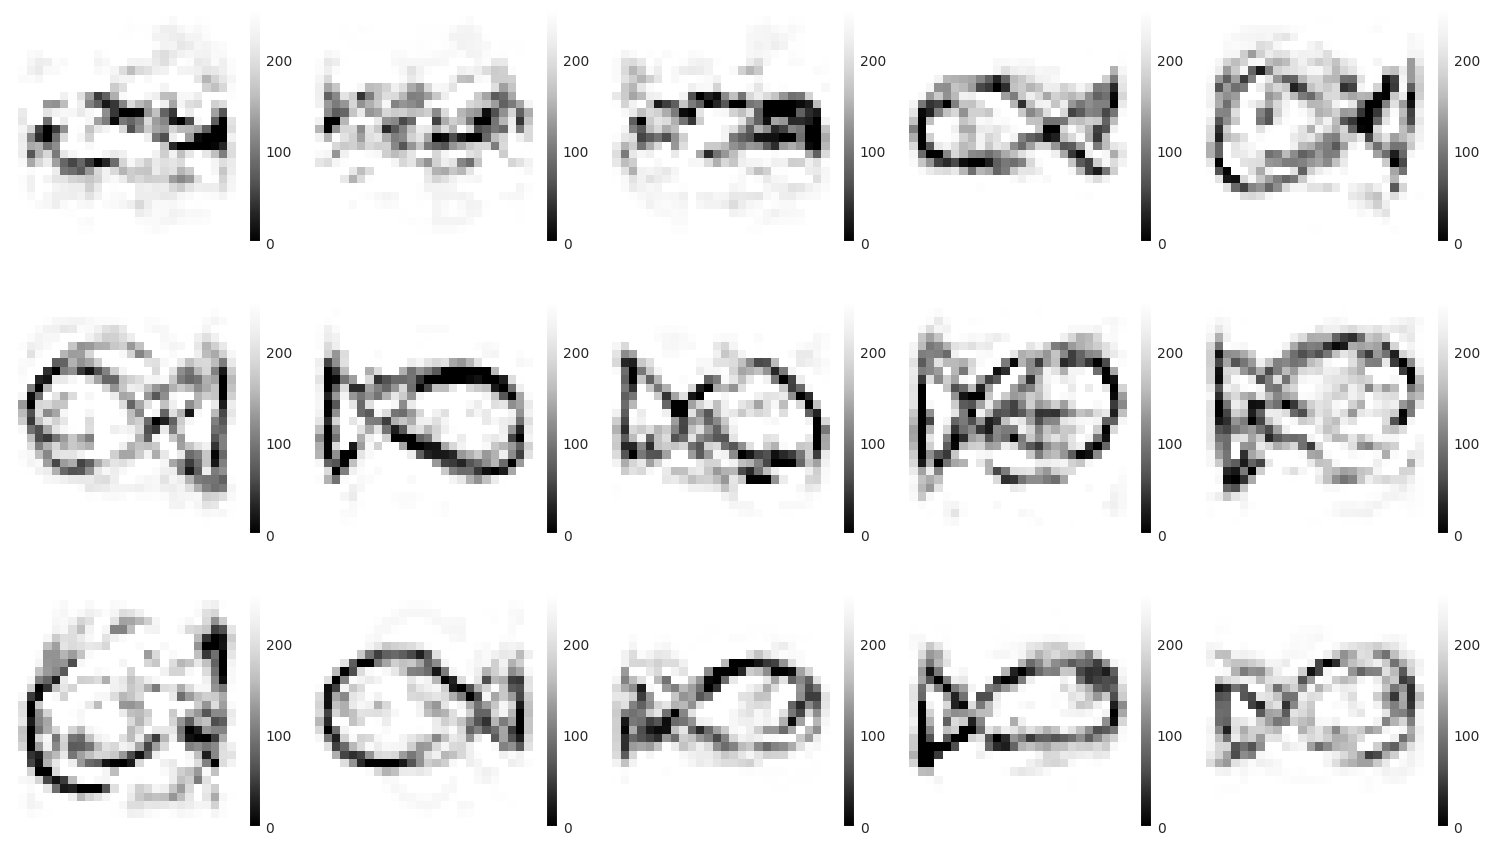

In [439]:
n_images = 15
random_img = gmm_model[2].sample(n_images)[0]
random_img = gmm_model[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))


isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

In [385]:
pca_components = 25

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(n_components=pca_components)),
    ('generator', c)
])

In [386]:
gmm_model_pca = build_pipe(GaussianMixture(n_components = 10, covariance_type="full"))
gmm_model_pca.fit(subset_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f11cccddb40>)),
                ('scaler', MinMaxScaler()),
                ('dim_reduce', PCA(n_components=25)),
                ('generator', GaussianMixture(n_components=10))])

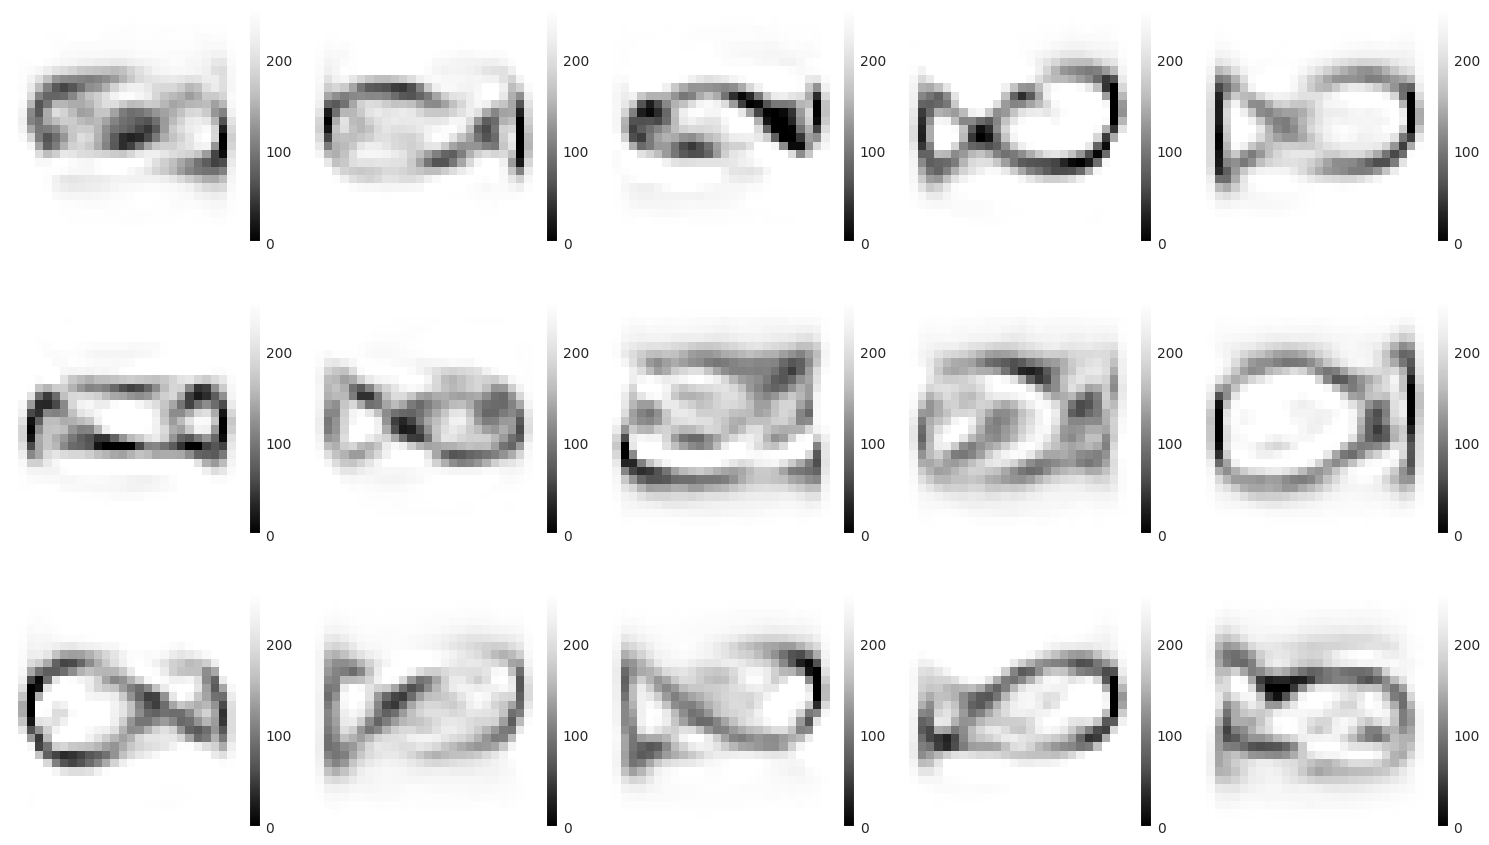

In [438]:
n_images = 15
random_img = gmm_model_pca[-1].sample(n_images)[0]
random_img = gmm_model_pca[2].inverse_transform(random_img)
random_img = gmm_model_pca[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()